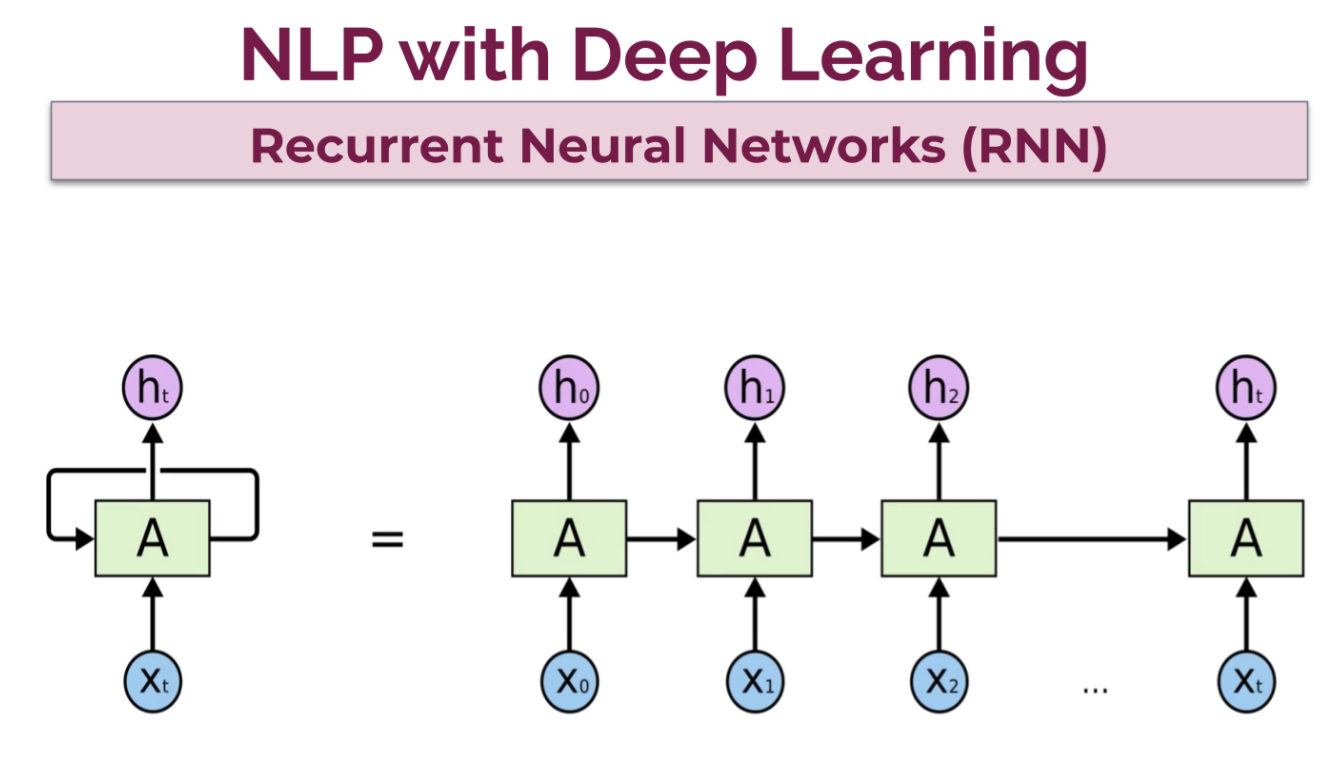

- RNN'de bir unutma problemi var ve bu yüzden bir çok geliştirmeler yapıldı.

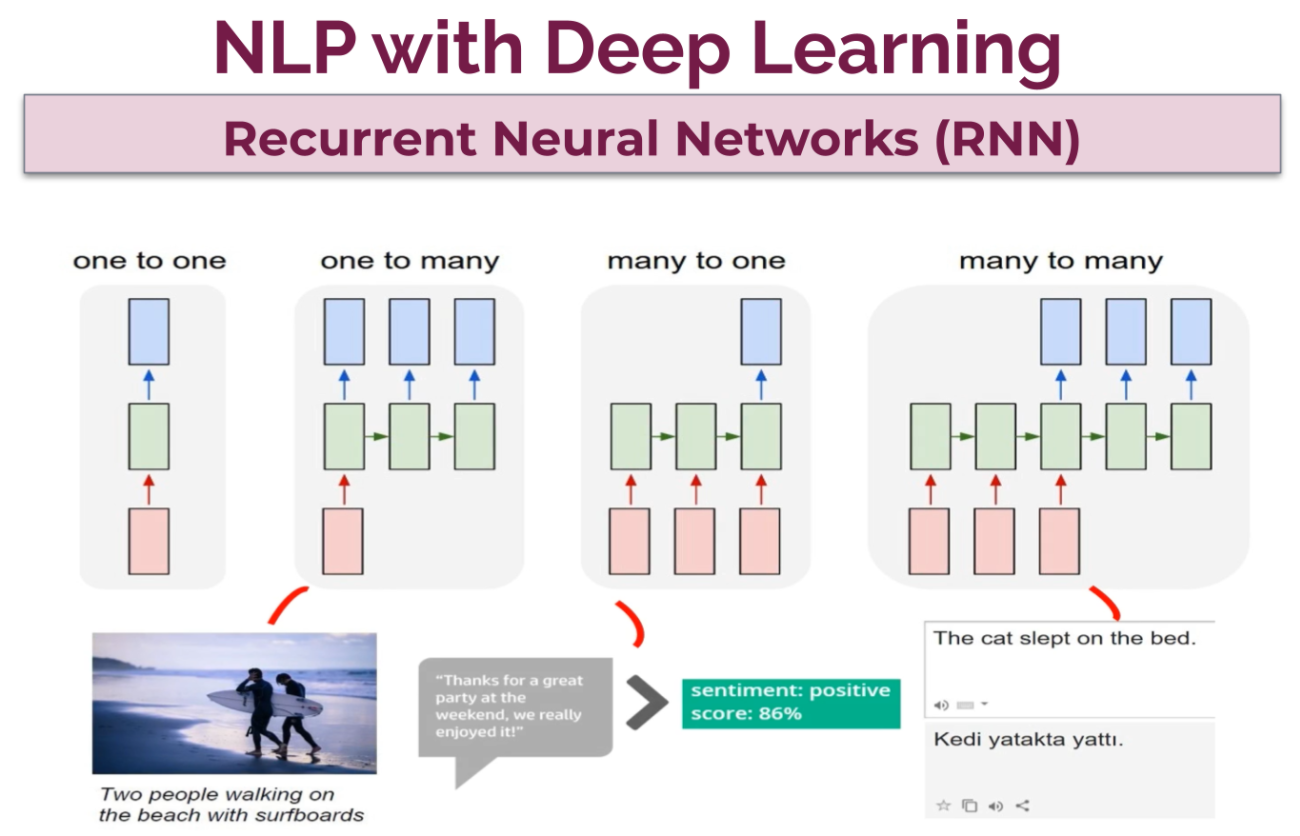

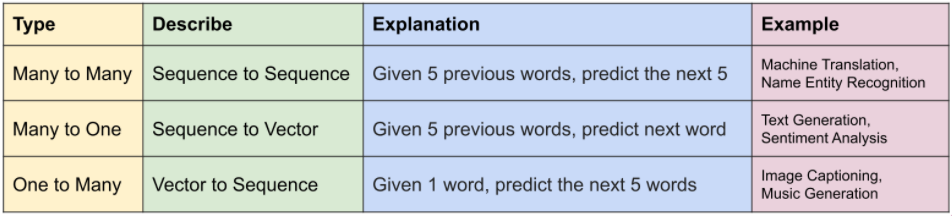

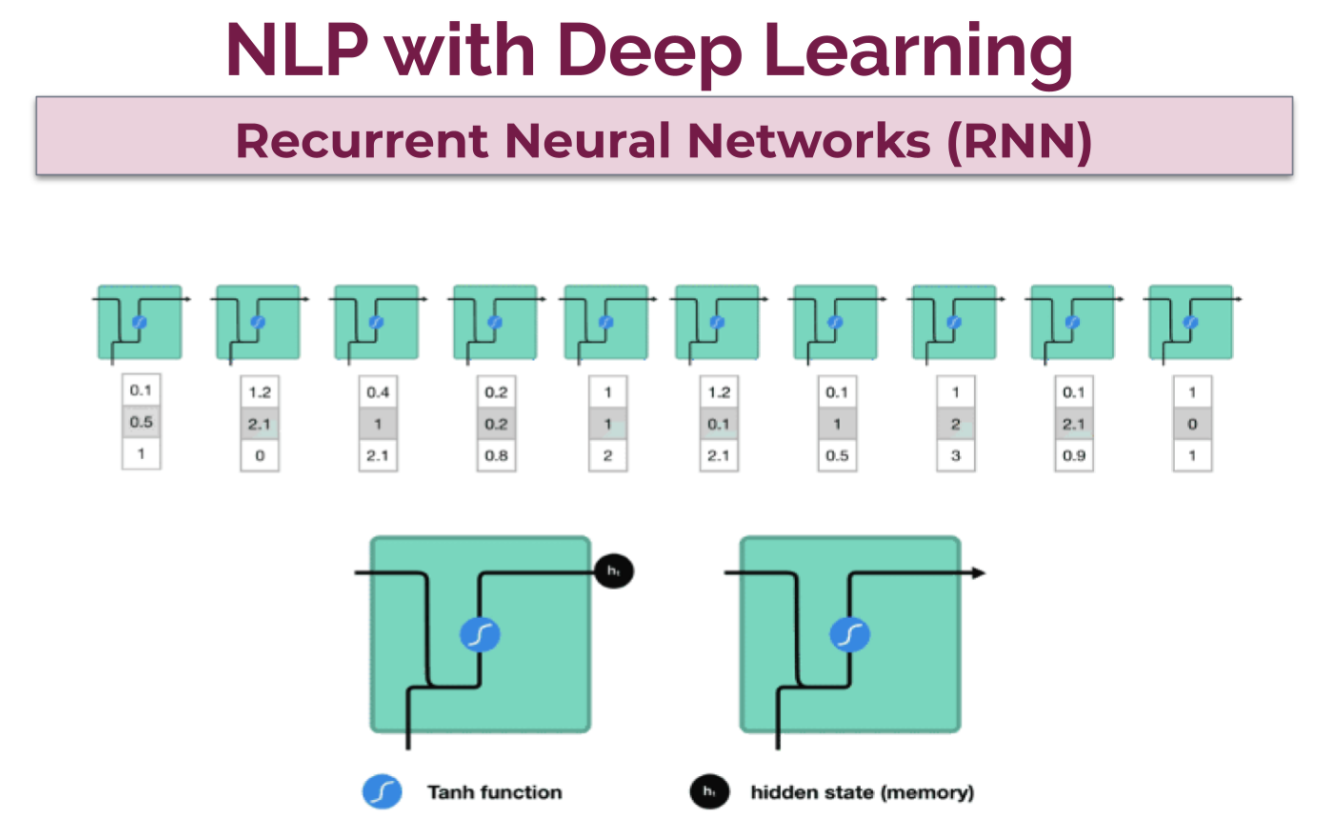

- Ondalık sayılar, kelimelerin vektöre dönüştürülmüş halidir.

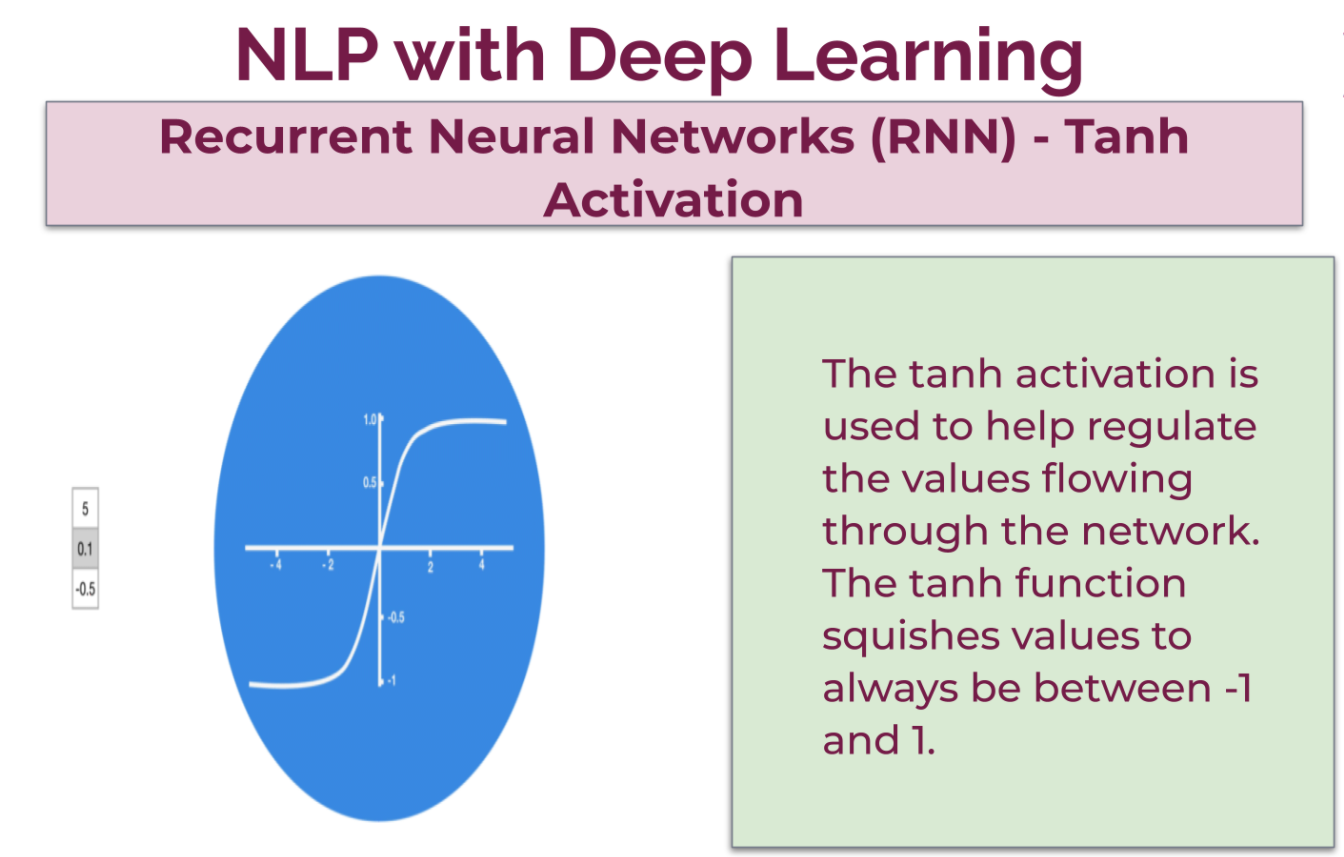

- tan aktivasyonu yerine başka bir (örn. linear) aktivasyon kullanılsaydı benim değerlerim çok büyüyeceği için kelimeler arası anlamsal bütünlük sağlanamayabilirdi.
- tan olmaz ise değerler patlar.<br>
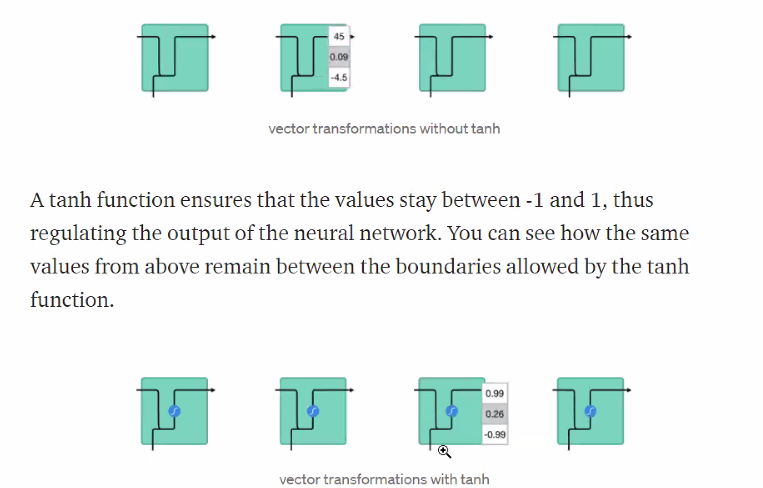

- RNN de sigmoid yoktur. GRU ve LSTM de sigmoid vardır. Sigmoid 0 ile 1 arasına sıkştırır.
- RNN de tan vardır ve -1 ile 1 araasına sıkıştırır.
- RNN de eksi olmasının anlamı, tamamen kelimelerin birbirine zıt olmasını sağlamak içindir. (man X woman gibi)  anlamsal değeri kaybetmemek için

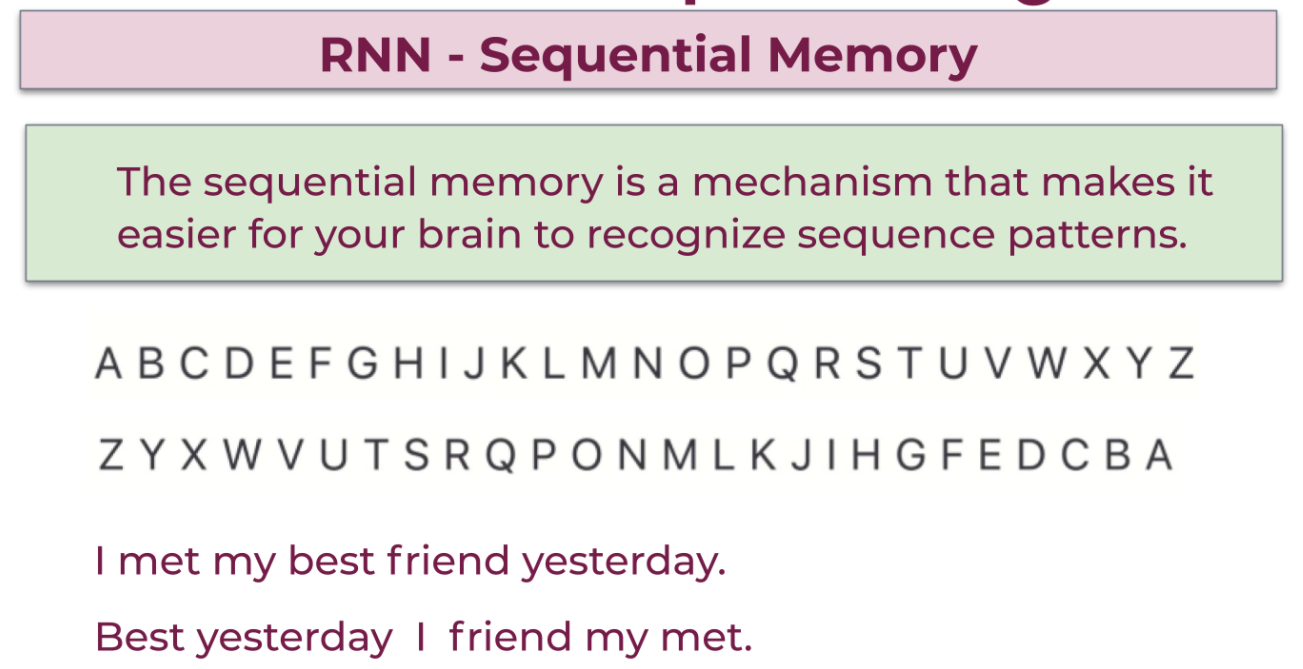

- RNN de veriler sıralı olmalıdır. Konuştuğumuz dile ait kelimeler bir sıra halinde olmalı ve bu şekilde anlaşılır hale gelir. 
- RNN de sequential memory ile hafızaya sıra ile alır.
- Moodelin de anlayabilmesi için bir insanın anlayabilecei bir sıra ile modele vermek gerek kelimeleri.

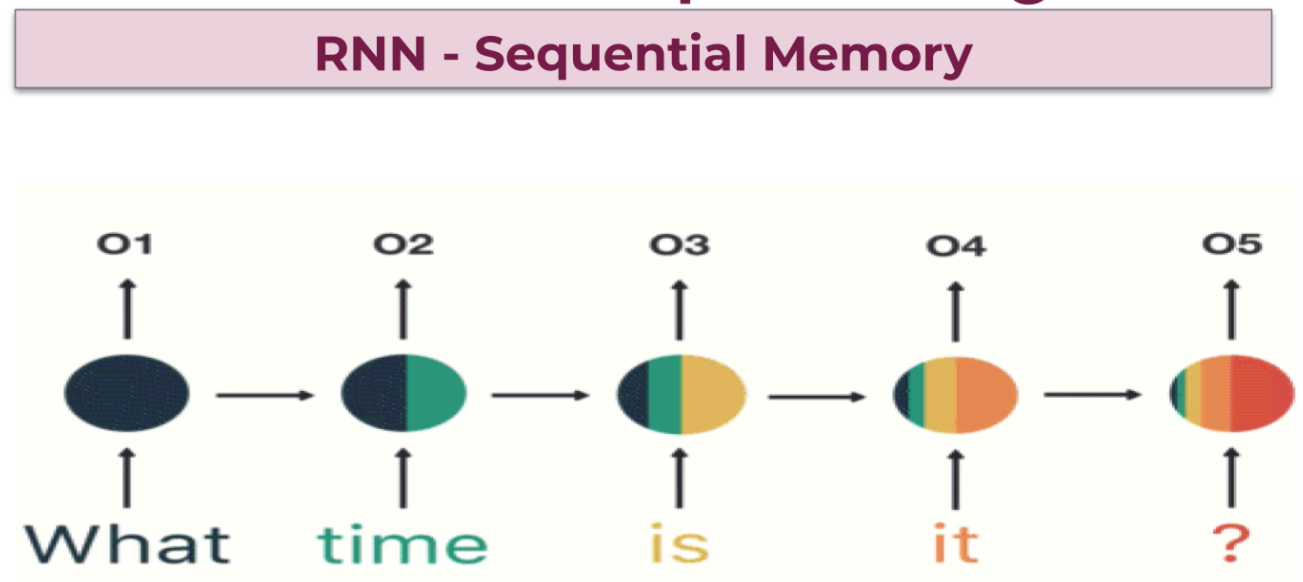

- RNN lerdeki unutma sorunu vardır. Bunları düzeltmemiz ve bir işlem yapmamız gerek.
- Model ne kadar uzarsa (uzun cümleler) ilk girdiler unutulabilir. (Vanishing gradient veya Explode gradient)
- Uzun cümlelerde RNN iyi değildir.

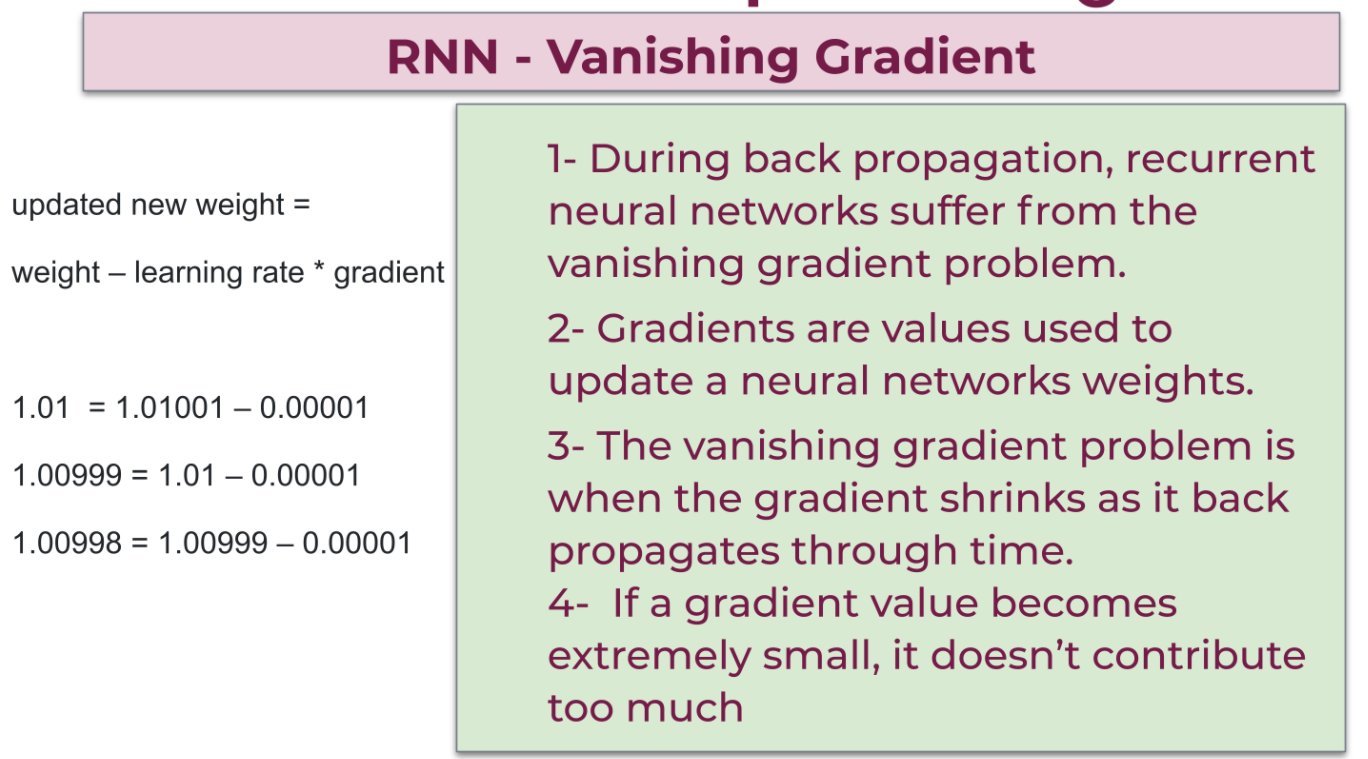

- RNN kelimelere güncelleme yaparak zamanla ağırlıklandırmalar atar.
- ASlında eğitim devam etmesine rağmen Vanishing sorununda model hiçbir şey öğrenmemeye başlıyor.
- Learning rate ile çarpılmasına rağmen yeni güncelenen katsayılar modelin öğrenmesini imkansız kılıyor.

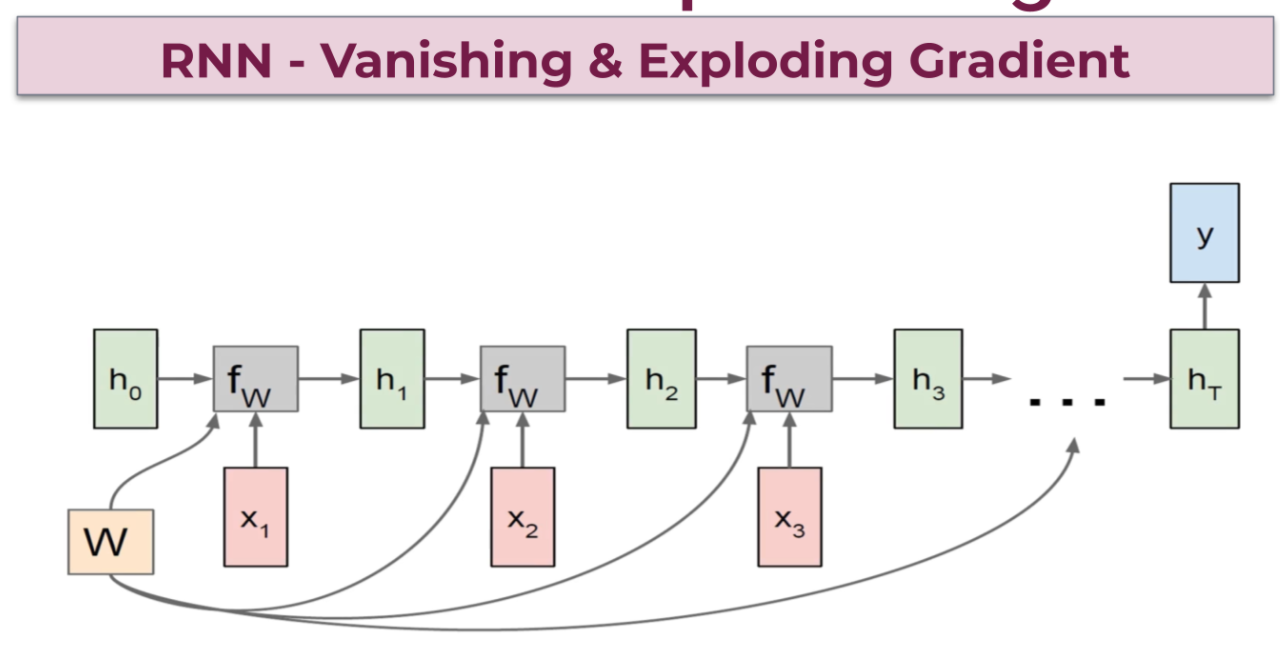

- Burada aynı katmanın farklı zaman dilimindeki katsayılar gösterilmiştir.
- CNN gibi farklı katmanlar değildir.
- Back propagation --> 

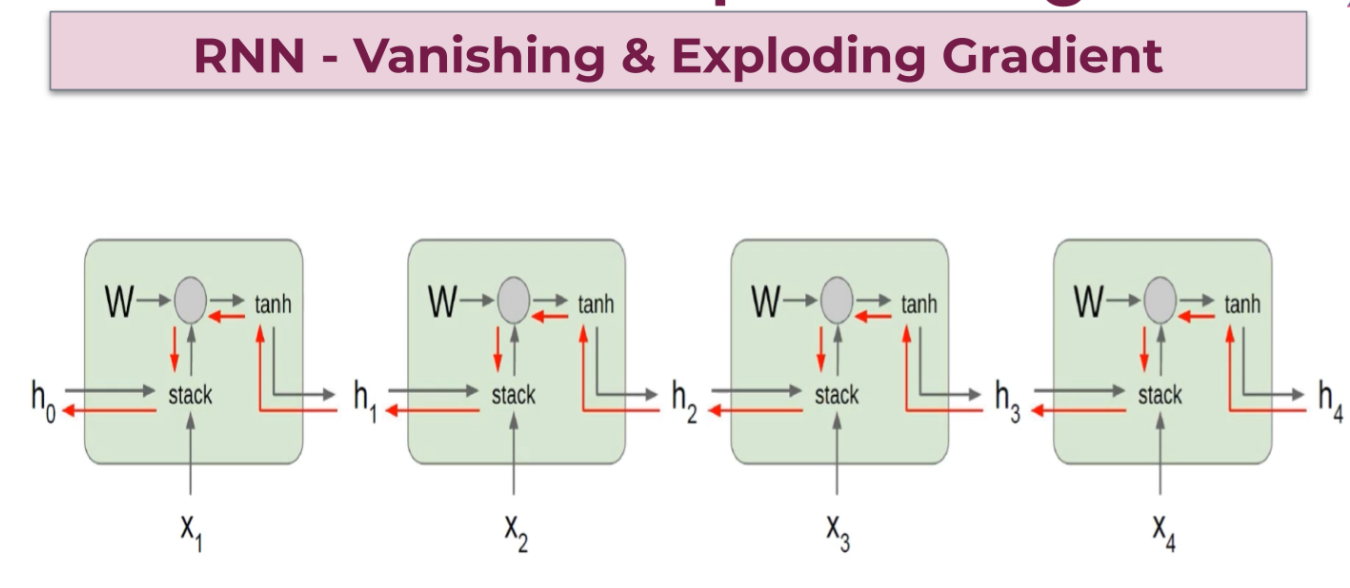

- W katsayısı mesela, 500 defa birbiri ile çarpılır. Eğer bu katsayı dşükse vanishing gradient e neden olur.
- Eğer katsayı büyük ise ve örneğin 500 defa veya 100 defa (backpropagation) katlanırsa artık explode (patlama olur) ve eğitim durur. Öğrenmeye mani olur.

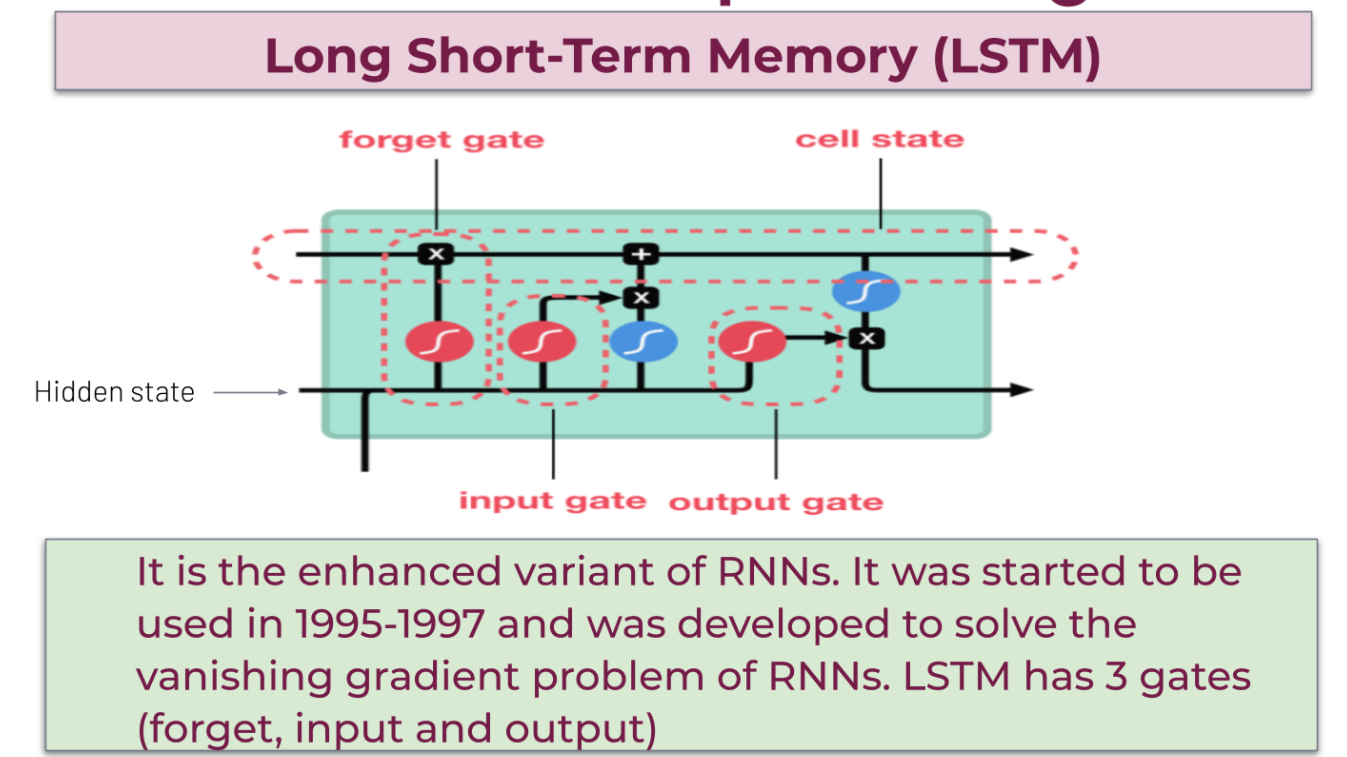

- RNN de uzun cümlelerde, bu unutma sorunu olduğu için, model sonucu mantıklı veremez. mesela 2 kelime hafızsı olan klasik bir RNN'de;
    - what time is it diye girdi olursa, RNN sadece is it kelimelerini anlar ve eğer bir chat bot kullanıyorsak, chat bot bize ne diyon gardaş der :D 

- LSTM'de 3 kapı var:
    - Forget gate = uzun süreli hafızımda tutlmaması gerek bilgileri silip/ silmemeye karar verir
        - LSTM mimarisinde temsil edilen ilk blok, unut kapısıdır (ft). Mevcut girişten (Xt) ve önceki gizli durumdan (ht) gelen bilgiler sigmoid aktivasyon fonksiyonundan geçirilir. Çıkış değeri 0'a yakınsa unutma, 1'e yakın ise tutma anlamına gelir.
    - Input gate = uzun süreli hafızamda tutulması istenen ve güncellenenbilgiler tutulur.
        - Hücre durumuna bir girdi olarak çalışır. İki bölümden oluşur; ilk olarak, hangi değerlerin güncelleneceğine karar vermek için önceki gizli durumu (ht) ve mevcut girişi (Xt) bir sigmoid fonksiyonuna geçiriyoruz. Ardından, ağı düzenlemek için aynı iki girişi tanh aktivasyonuna geçirin. Son olarak, hücre durumunu güncellemek için hangi bilgilerin önemli olduğuna karar vermek için tanh çıktısını (C't) sigmoid çıktısı (it) ile çarpın.
    - Output gate = cel state ile hidden state i birleştirir.
        - Gizli durum, önceki girdilerle ilgili bilgileri içerir ve tahmin için kullanılır. Çıkış kapısı, mevcut gizli durumu (ht) düzenler. Önceki gizli durum (ht-1) ve mevcut giriş (xt), sigmoid işlevine iletilir. Bu çıktı, mevcut gizli durumu elde etmek için tanh fonksiyonunun çıktısı ile çarpılır. Mevcut durum (Ct) ve mevcut gizli durum (ht), klasik bir LSTM ünitesinin son çıktılarıdır.
    - Cell State = Önceki hücre durumundan (Ct-1) gelen girdi, unutma kapısı çıktısıyla noktasal olarak çarpılır. Unutma çıktısı 0 ise, önceki hücre çıktısını (Ct-1) atacaktır. Bu çıkış, yeni hücre durumunu (Ct) güncellemek için giriş kapısı çıkışına noktasal olarak eklenir. Mevcut hücre durumu, bir sonraki LSTM biriminin girişi olacaktır.
    
- Input gate, LSTM biriminin mevcut hücre durumunda hangi bilgilerin güncellenmesiyle ilgili olduğuna karar verir. Output gate, bir sonraki LSTM birimine geçirilecek olan mevcut gizli durumu belirler.

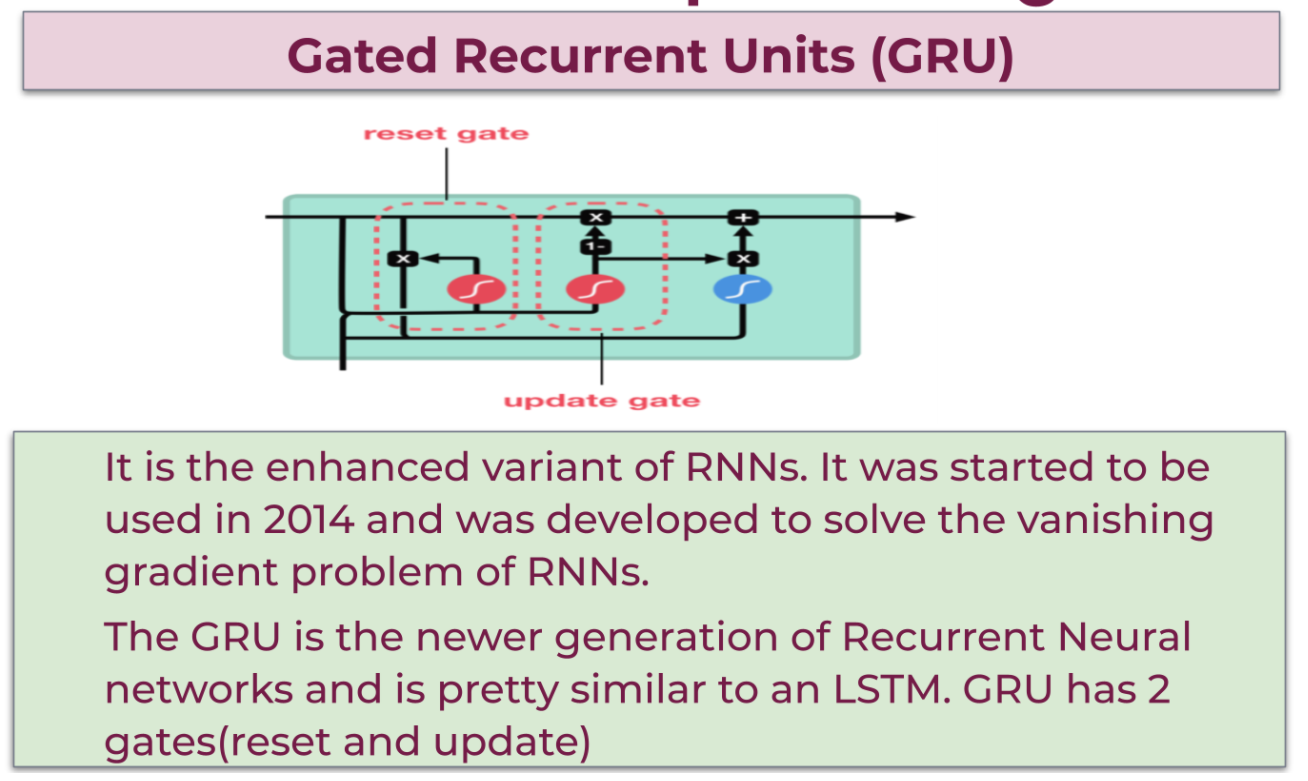

- LSTM den daha hızlı çalışır. (GRU)
- update gate: Forget gate ve input gate in karışımı gibi neyi unutup neyi tutacağım.
- reset gate: ne kadarını aklımda tutacağımı ayarlar.
- lstm i kısaltmış. 2 gate e düşürmüş. İşlemi hızlandırmış.

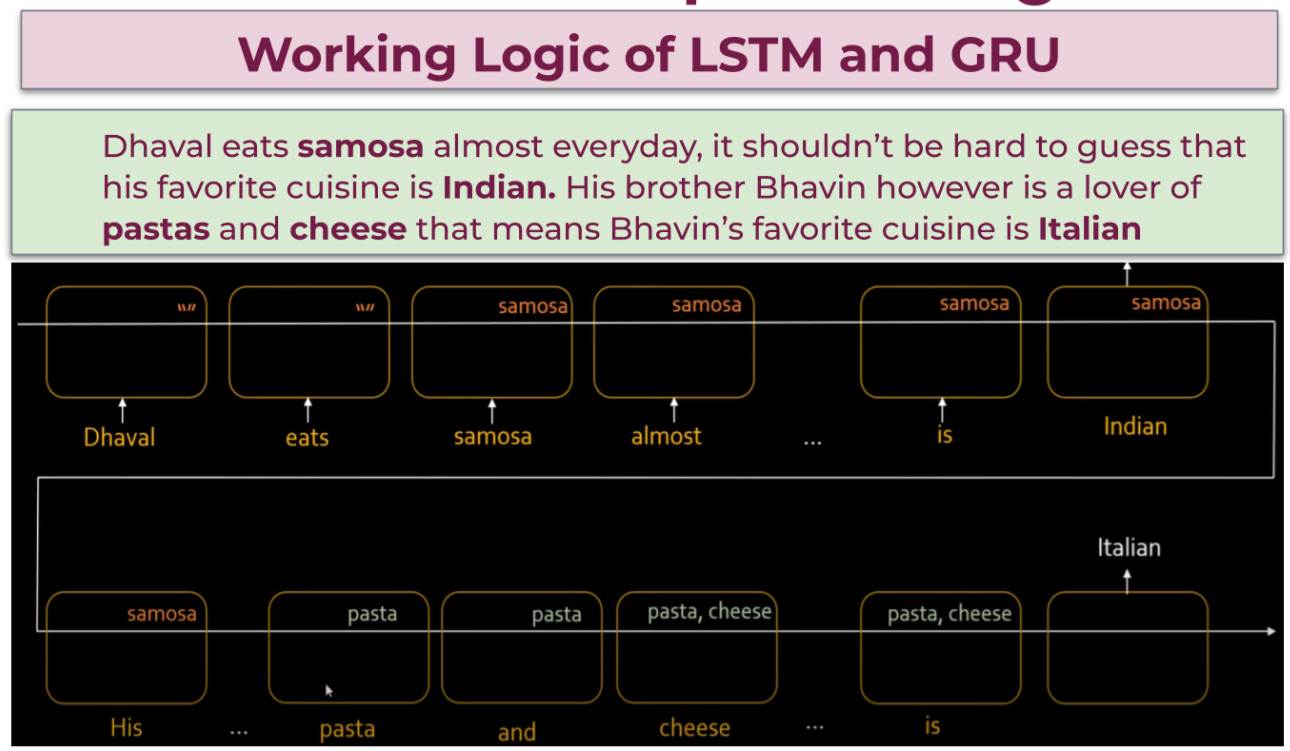

- RNN eski bilgileri unuttup, yeni gelen kelimeler ile tahmin etmek için yeni kelimeyi hafızaya alıyor.
- Sonra yeni kelimeleri hidden state'e geliyor ama, uzun süreli hafızam olan cell state, hafızasındakileri hidden state'e hatırlatıyor ve modelin unutması problemini gideriyor.

## NLP with DL (Standart)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df

Rating                                             Review
0            1                            3 yıldır tık demedi. :)
1            1                      3 yıldır kullanıyorum müthiş 
2            1  Ürün bugün elime geçti çok fazla inceleme fırs...
3            1  Almaya karar verdim. Hemencecik geldi. Keyifle...
4            1  Günlük kullanımınızı çok çok iyi karsılıyor kı...
...        ...                                                ...
243492       1                                fiyatına göre güzel
243493       1  Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494       1                            Hızlı Kargo, güzel ürün
243495       1  telefon başarılı hızlı bir cihaz  sadece beyaz...
243496       1  Urun cok guzel pazar gunu siparis verdim adana...

[243497 rows x 2 columns]

## Tokenization

In [4]:
X = df['Review'].values
y = df['Rating'].values

In [5]:
num_words = 15000 

# corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
# Datasetimdeki bütün tokenler önemi değil. Bu tür duygu analizi veya sınıflandırma gibi algoritmalarda bütün tokenler kullanılmaz.

# Corpus'ta genellikle 10000 - 15000 civarı gibi kelime ile eğitim yapılır. Yeterlidir.
# Noktalama işaretlerinin çıkarılması ve özel karakterlerin çıkarılması yeterlidir. İsterseniz sayıları da çıkarabilirsiniz ama gerek yok.
# Ama çeviri yapacaksak (özellikle translate) default olan "NaN" tutulur. Hiçbir şeyi ayırmam.

tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [7]:
tokenizer.fit_on_texts(X)  # Eğitimi 15000 tane  ile yapacak

## Creating word index

In [10]:
tokenizer.word_index  
# bunlar kullanım sayısı değil. Bunlar corpus'ta en fazla kullanılan tokenler in büyükten küçüğe doğru sıralaması. 

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [8]:
len(tokenizer.word_index) 
# Benim yine modelim eğitim için en fazla kullanılan ilk 15000 tane token ı hafızasına aldı. Aşağıdaki sayı kafa karıştırmasın.

217983

## Converting tokens to numeric

In [9]:
X_num_tokens = tokenizer.texts_to_sequences(X) 

# Benim yukarıki "tokenizer.word_index" numaraya göre, yorumlarımı numaraya çeviriyor.
                                                # Her tokenlerdeki sayısal karşılığı olan numarayı alıp, o numaraya dönüştürdü.

In [11]:
X[105]  # "çok" kelimesi 6. kelimedir. # word indexte "çok" 1. sırada idi.

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [13]:
print(X_num_tokens[105]) 
# burada "çok" 5. sırada , bu farkın sebebi eğitim esnasında, 
# en fazla kullanılan ilk 15000 kelimeyi aldığı için, aradaki kelimeyi ignore etti. Muhtemelen Logitech yoktur.

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


- Benim modelime vereceğim bu dizilerin kaç tokenli olmaı gerektiğine (boyut) karar vermem gerek.
- 105 --> 22 tokenli bir yorumken, 106 --> 18 tokenli bir yorum.

In [14]:
len(X_num_tokens[105])

22

In [15]:
len(X_num_tokens[106])

18

- Aşağıdaki fonksiyon uygulanır ve;
    - Benim corpusumdaki bütün yorumlarımın ortalama kaç tokenden oluştuğunu buldum.

In [20]:
num_tokens = [len(tokens) for tokens in X_num_tokens] # numeric hale cevirdiğim  her satırdaki token sayılarını bu listeye yazdırıyorum 
num_tokens = np.array(num_tokens)   #arraye cevirdim

## Maximum number of tokens for all documents

In [21]:
num_tokens.mean()  # tüm yorumların ortalama kaç  tokenden oluştugunu gösteriyor

21.36101060793357

In [22]:
num_tokens.max()  # en uzun yorumumun kaç tokenli olduğu

298

In [23]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [24]:
X[21941]  # indexi koyup baktık.

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

- num_tokens = Benim bütün yorumlarımın bulunduğu sabit liste.
    - Aşağıdaki fonksiyon 61 yorumdan kısa olanları true (1) ve uzun olanlar false(0) verecek. **PADDING**

In [26]:
max_tokens = 61

In [27]:
sum(num_tokens < max_tokens) / len(num_tokens)  # Yorumlarımın %96 sı 61 token sayısından az.
                                                # Bu sayı (max_tokens), %90 ten yukarı bir skor çıkaracak şekilde belirlenir.

0.9598968365113328

In [28]:
sum(num_tokens < 61)  # corpustaki 250000 yorumdan 233732 tanesi 61 token den az.

233732

- 61 den küçük olanların eksik kalan kısımlarını 0 peddingi uyguulayacak.
- 61 den fazla token sayılı yorumların son 61 tanesini alıp 1 atayacak ve öncekileri kırpacak.

## Fixing token counts of all documents (pad_sequences)

In [33]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens) # tüm uzunluklar 61 token oldu

In [34]:
X_pad.shape

(243497, 61)

In [32]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [33]:
X_pad[800] # 61 den küçük olanların başına 0 koymuş

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10])

In [35]:
np.array(X_num_tokens[212558])

array([ 1789,  2440,     7,    44,  1837,    38,    84,   250,    85,
          84,  2181,    41,    26,   134,   209,     3,   716,    11,
         795,     5,  1478,    58,  1478,    72,   181,  1943,    44,
        1433,  4082,   947,   625,   636,    26,  2817,  5518,  3515,
         241,  1158,  1174,   454,   874,   755,     1,     7,     3,
          45,  2555,     1,     6,   585,  1068,  1160,   170,   811,
        2440,  1455,   472,  1785,  2704,  2223,   182,    49,     1,
           6,   188,     1,   402,    65,    65,  2330,   345, 13609,
         104,  1427,    46,    52,   261,    63,  3515,   260,   232,
        2108,    50,    12,     2, 10826,  5593,     5,    31, 12274,
        4819,     2,  2731,    60,    28,   111,  9906,     1,    79,
         571,  3637,   546,  5455,     1,     6,  2714,   373,   118,
         604,   250,  7804,  5277,  6164,  1263,    23,  2871,    14,
           6,   133,    56,  8334,    20,  3515,  1174,   170,    14,
           3,   402,

In [36]:
X_pad[212558]

array([ 367,    1,   24,   80,  133,   90,  245, 2219, 9352,    5,   39,
        315,   25,    6,   44,  245, 2233,    8, 9698,  167,   37,  275,
        232,    5, 3979,  134, 7919, 2118,  310,  437, 4901,   36,   25,
        138,  940,  590,    3, 1625,  590,   12,    5,  874,  335,    2,
       2204,   17,  501,  420,  961,   17,   36, 4289, 2091, 2740,   60,
          1,   96,    9,   10,  898, 4239])

- Padding ile 0 değer basılan yorumlardan model yine o dizinden aynı anlamı çıkarır.
- Olumlu yorumlar ne kadar baş tarafta ise onlar kaçabilir. 

## Converting numeric tokens to string

In [44]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))  # zip --> 2 listeden verileri tek bir for döngüsü ile çekmeye yarar.
                                                       # index'in value ve key lerini tersine çevireceğiz. key --> token, value --> rakam
inverse_map  #  inverse le tersine çevirme işi gerçekleştirildi.

# Bunu neden yaptık?
    # Tokenlere karşılık gelen rakamların hangi token olduğunu görmek için. Ne kadar anlam kaybı olmuş diye kontrol için. Modelde kullanılmayacak.

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [45]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]  # bu tokenlerden 0 haricindeki numaraları al. Bu sayı karşılığına gelen string tokenleri getir.
    text = ' '.join(words)
    return text

In [46]:
X[800] # önce numerice cevirdik en fazla kullanılan 15k token ile 

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [48]:
tokens_to_string(X_num_tokens[800]) # alınan numaraları tekrar stringe çevirdim

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

## Train Set Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  
# stratify = imbalance önlemek için. dengesizlik olan veri setinde train ve test setine dengeli bir şekilde dagıtıyor

## Modelling

In [77]:
model = Sequential()

In [78]:
embedding_size = 100 
# benim modelime verdiğim o dizinlerin ,içerisinde hatırlarsanız her birinde 61 token olacak. O tokenlerin her birini 100 lük vektörlere çevir diyorum.

In [79]:
model.add(Embedding(input_dim=num_words,        # modelim kaç token ile eğitelecek, yukarıda hatırlarsanız 15000 vermiştik.  Test setimde 15000 haricinde bir token kullanılırsa test setimdeki token ignore edilecek
                    output_dim=embedding_size,  # Sana gönderdiğim her dizin 61 tokenden oluşur. Bunlar 15000 token ile eğitilecek. Embedding layer dan kaçlık vektöre dönüşşün                                          
                    input_length=max_tokens,    # Benim modele 100 lük vektörler halinde girecek.
                    name='embedding_layer'))   

In [80]:
# output_dim : 15000 token gelsin bunların hepsini 100 lük vektörlere dönüştür ve ona göre gru ya da lstm e  gönder
 
# input_dim :
# modelim kaç token ile eğitilecek (15000)
# input_length=max_tokens modele vereceğim  her tokenin  61 uzunlugundaki token  ile eğitilecek 

In [81]:
!pip install -U numpy==1.19.5

In [82]:
model.add(GRU(units=48, return_sequences=True))  # nöron sayıları 2 ve katları sayılar belirlemek best practise dir. Direkt 500 veya 100 de diyebilirdik.
model.add(GRU(units=24, return_sequences=True))  # "return_sequences=True" GRU modelleri dizinlere aktarırken true yaparız. bir sonraki katman LSTM veya GRU ise kullanılır. 
model.add(GRU(units=12))                         # GRU veya LSTM olmadığı için "return_sequences=True" kullanmadık.
model.add(Dense(1, activation='sigmoid'))        # 0 veya 1 lerden oluşan çıktılar almam gerektiği için sigmoid kullandım.

In [83]:
optimizer = Adam(lr=0.004)

In [84]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall']) #olumsuzları yakalamaya calısıyorum o yüzden recall verdim

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [85]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 61, 100)           1500000   
_________________________________________________________________
gru_4 (GRU)                  (None, 61, 48)            21600     
_________________________________________________________________
gru_5 (GRU)                  (None, 61, 24)            5328      
_________________________________________________________________
gru_6 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [86]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)  # restore_best_weights --> en iyi skoru yakalamak için kullanılır. 
                                                                                # yoksa patient sonundaki skoru verir.

In [87]:
pd.Series(y_train).value_counts(normalize=True)  # class ların oranına bakar ve ağırlıklarını dengeleriz.

1    0.943834
0    0.056166
dtype: float64

In [88]:
weights = {0:95, 1:5}  # anlamadım. balance kullanılabilinir miydi? Class weight balance varsa dene

In [89]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
761/761 [==============================] - 269s 342ms/step - loss: 3.1941 - recall: 0.8512 - val_loss: 0.1780 - val_recall: 0.9395
Epoch 2/25
761/761 [==============================] - 276s 363ms/step - loss: 1.7573 - recall: 0.9294 - val_loss: 0.2340 - val_recall: 0.9074
Epoch 3/25
761/761 [==============================] - 300s 395ms/step - loss: 1.1080 - recall: 0.9566 - val_loss: 0.1905 - val_recall: 0.9352
Epoch 4/25
761/761 [==============================] - 285s 375ms/step - loss: 0.8050 - recall: 0.9704 - val_loss: 0.1986 - val_recall: 0.9431
Epoch 5/25
761/761 [==============================] - 225s 295ms/step - loss: 0.6381 - recall: 0.9773 - val_loss: 0.1821 - val_recall: 0.9566
Epoch 6/25
761/761 [==============================] - 228s 299ms/step - loss: 0.5573 - recall: 0.9802 - val_loss: 0.2365 - val_recall: 0.9322
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


## Model evaluation

In [91]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  3.194064  0.851221  0.177966    0.939541
1  1.757283  0.929439  0.234004    0.907408
2  1.107969  0.956645  0.190499    0.935168
3  0.805015  0.970439  0.198608    0.943109
4  0.638052  0.977292  0.182093    0.956619

<AxesSubplot:>

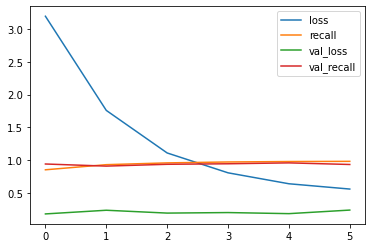

In [92]:
model_loss.plot() #eğitildikçe modelim daha da iyileştiğini görebiliriz

In [47]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 93s 15ms/step - loss: 0.0636 - recall: 0.9793


[0.0636356920003891, 0.9792500734329224]

In [48]:
model.evaluate(X_test, y_test)  # restore_best_weights=True kullanıldığı için epoklardaki patiencce ın en iyi sonucunu getirdi

1522/1522 [==============================] - 24s 15ms/step - loss: 0.1440 - recall: 0.9613


[0.14400789141654968, 0.9613183736801147]

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32") 

# true olanlar (0.5 ten büyük olanları) 1 e, false ları (0.5 ten küçükleri) 0 çevir.

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 10232    709]
 [  9930 173926]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.94      0.66     10941
           1       1.00      0.95      0.97    183856

    accuracy                           0.95    194797
   macro avg       0.75      0.94      0.81    194797
weighted avg       0.97      0.95      0.95    194797



- Skorlar birbirine yakın ve overfit yok.
- Sıra geldi test datasına ;

In [94]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 2323   412]
 [ 2779 43186]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.85      0.59      2735
           1       0.99      0.94      0.96     45965

    accuracy                           0.93     48700
   macro avg       0.72      0.89      0.78     48700
weighted avg       0.96      0.93      0.94     48700



2735 taeneden % 85 tanesini yakalamış.

In [95]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [96]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [97]:
y_pred2 = np.array([i[0] for i in y_pred])  # ypred i y test formatına çevirdim ki satır sayısı az dönsün. 1 ve sıfırları köşeli parantezlerden kurtardık.
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [98]:
incorrect = np.where(y_test != y_pred2)  # y test ve y red in birbirine eşit olmadığı yerleri bulduk.
incorrect

(array([   10,    11,    26, ..., 48622, 48625, 48678], dtype=int64),)

In [99]:
incorrect = incorrect[0]
incorrect

array([   10,    11,    26, ..., 48622, 48625, 48678], dtype=int64)

In [102]:
len(incorrect)  # 250000 tane yorumdan 3191 tane yanlış bilmiş.

3191

In [103]:
idx = incorrect[0]
idx

10

In [104]:
text = X_test[idx]
text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  891,  327,  171, 1491,
         84,  456,   31,  171,  466,   74,   84,   54,  266,  241, 1158,
       1917,   52,  371,  327,  171, 2979,   13,   65,  371,   84,  129,
        361,   84, 1917, 3536,   72,    2,  208,  360,   34,    5,    4,
       1906,  120, 2498,  132,    1, 2893])

In [105]:
tokens_to_string(text)  # yanlış tahmin edilen yrumlar buradaki gibi görselleştirilip değerlendirilir.

'xiaomi mi 6 nın şarj cihazı ile 6 saatte tam şarj oldu iphone 7 plus ı 3 kere mi 6 yı da 5 kere şarj ettim hala şarj ı bitmedi uzun bir kullanım süresi var bu ürün varken başka powerbank almak çok saçma'

In [106]:
y_pred[idx]

array([0])

In [107]:
y_test[idx]

1

In [108]:
y_pr = model.predict(X_test)

In [109]:
y_pr[idx]

array([0.15992558], dtype=float32)

## Predicton

In [110]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [111]:
tokens = tokenizer.texts_to_sequences(reviews)  # bunları bi token e çevirdik. Bunları eğittiğim 15000 tokene göre sayısal veri ye dönüştürmem lazım.
                                                # tokenizer en fazla kullanılan ilk 15000 token e göre ayarlanmıştı. olmayanları zaten ignore ediliyordu.

In [112]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [113]:
model.predict(tokens_pad)  # 0.5 ten büyük olanları olumlu, 0.5 ten küçük olanları olumsuz olarak yakalamış.

array([[0.98817194],
       [0.88341105],
       [0.0143536 ],
       [0.6509586 ],
       [0.2559898 ],
       [0.01610905],
       [0.44436014],
       [0.11323342],
       [0.9410031 ],
       [0.02257887],
       [0.9818877 ],
       [0.24183309],
       [0.02728164],
       [0.93725026]], dtype=float32)